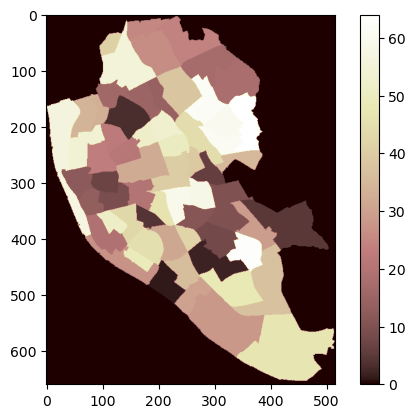

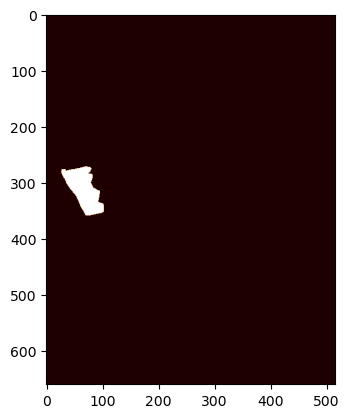

Mean elevation: 101.33 m


In [21]:
# Importing libraries
%matplotlib inline
import numpy as np
import rasterio as rio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from rasterio.features import rasterize
import folium
import numpy as np
import rasterio as rio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterstats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from rasterio.features import rasterize


# Function for loading raster data
def load_raster(file_path):
    """
    Load a raster file and return the data and affine transformation.
    
    Parameters:
    file_path (str): Path to the raster file.
    
    Returns:
    tuple: A tuple containing the raster data array and the affine transformation.
    """
    with rio.open(file_path) as src:
        return src.read(1), src.transform

# Function for rasterizing wards
def rasterize_wards(df, landcover_shape, landcover_transform):
    """
    Rasterize the wards shapefile.
    
    Parameters:
    df (GeoDataFrame): Wards shapefile as a GeoDataFrame.
    landcover_shape (tuple): Shape of the landcover raster.
    landcover_transform (Affine): Affine transformation for the landcover raster.
    
    Returns:
    ndarray: The rasterized wards.
    """
    wards_shapes = list(zip(df['geometry'], df['WARDNUMBER']))
    return rasterize(shapes=wards_shapes, fill=0, out_shape=landcover_shape,
                     transform=landcover_transform, dtype=np.uint8)

def display_rasterized_wards(wards_mask, cmap='viridis'):
    """
    Display a visual representation of the rasterized wards.

    Parameters:
    wards_mask (ndarray): A numpy array where each pixel value represents a ward. 
                          The array is a rasterized version of the ward boundaries.
    cmap (str): The color map to use for displaying the rasterized wards. Default is 'viridis'.
    """
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(wards_mask, cmap=cmap)
    fig.colorbar(im)
    plt.show()

# Get a list of all available colormaps
colormaps = plt.colormaps()

# Print the list of colormaps
print("Available colormaps:")
for cmap in colormaps:
    print(cmap)

# Load the landcover raster
landcover, affine_tfm = load_raster("C:/EGM722/egm722/green_space_project/raster/LCM2015_LP.tif")

# Open DEM GeoTIFF file using rasterio
with rio.open('C:/EGM722/egm722/green_space_project/ASTGTM/ASTGTMV003_N53W003_dem.tif') as dataset:
    dem = dataset.read(1)
    affine_dem = dataset.transform

# Load the wards shapefile
df = gpd.read_file("C:/EGM722/egm722/green_space_project/data_files/Lwards.shp")

# Rasterize the wards
wards_mask = rasterize_wards(df, landcover.shape, affine_tfm)

# Visualize the rasterized output
display_rasterized_wards(wards_mask, cmap='pink')

# Further exploring the DEM
ccnorth_and_ccsouth = np.logical_or(wards_mask == 12, wards_mask == 13)

# Resize the boolean mask to match the shape of the dem array
ccnorth_and_ccsouth_resized = np.resize(ccnorth_and_ccsouth, dem.shape)

# Index the dem array using the resized boolean mask
NS_elevation = dem[ccnorth_and_ccsouth_resized]

# Plot City Centre North and City Centre South
fig, ax = plt.subplots(1, 1)
ax.imshow(ccnorth_and_ccsouth, cmap='pink')
plt.show()

# Print the mean elevation
print('Mean elevation: {:.2f} m'.format(NS_elevation.mean()))


In [17]:
# Get a list of all available colormaps
colormaps = plt.colormaps()

# Print the list of colormaps
print("Available colormaps:")
for cmap in colormaps:
    print(cmap)

Available colormaps:
magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
c

{'Broadleaf woodland': 5.233085789922782, 'Coniferous woodland': 0.1691496386348629, 'Arable and Horticulture': 5.664553049969999, 'Improved grassland': 7.7133441275526975, 'Semi-natural grassland': 3.7001860344510473, 'Acid Grassland': 0.14924968114840848, 'Heather': 1.0396220214135603, 'Fen, Marsh and Swamp': 0.8062497927087763, 'Bog': 0.24422675097012292, 'Inland Rock': 12.99889344175795, 'Urban': 0.20050714740139725, 'Suburban': 22.733590826722626, 'Supra-littoral Rock': 39.34734169734577}
{'Broadleaf woodland': 283, 'Improved grassland': 822, 'Fen, Marsh and Swamp': 89, 'Bog': 1, 'Inland Rock': 3, 'Urban': 5, 'Suburban': 372, 'Supra-littoral Rock': 971}


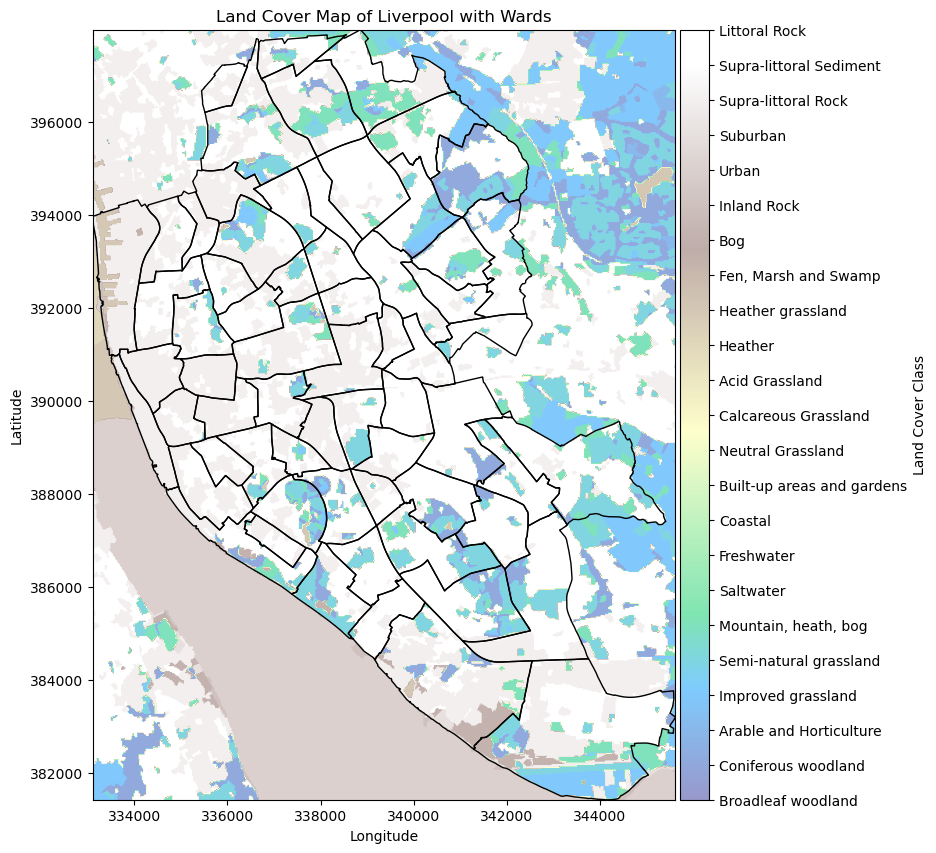

In [4]:
# zonal statistics using rasterstats

# Create a dictionary of landcover value/name pairs
names = ['Broadleaf woodland', 'Coniferous woodland', 'Arable and Horticulture', 'Improved grassland',
         'Semi-natural grassland', 'Mountain, heath, bog', 'Saltwater', 'Freshwater', 'Coastal',
         'Built-up areas and gardens', 'Neutral Grassland', 'Calcareous Grassland', 'Acid Grassland',
         'Heather', 'Heather grassland', 'Fen, Marsh and Swamp', 'Bog', 'Inland Rock', 'Urban',
         'Suburban', 'Supra-littoral Rock', 'Supra-littoral Sediment', 'Littoral Rock']
values = range(1, 24)  # Get numbers from 1-23, corresponding to the landcover values

# Create a dictionary of landcover value/name pairs
landcover_names = dict(zip(values, names))

# Open the Liverpool land cover raster and read the data
with rio.open('C:\\EGM722\\egm722\\green_space_project\\raster\\LCM2015_Liverpool.tif') as dataset:
    xmin, ymin, xmax, ymax = dataset.bounds
    crs = dataset.crs
    landcover = dataset.read(1)
    affine_tfm = dataset.transform

# Load the Liverpool wards shapefile
liverpool_wards = gpd.read_file('C:\\EGM722\\egm722\\green_space_project\\data_files\\Lwards.shp').to_crs(crs)

# Define a function to count unique elements of an array
def count_unique(array, names, nodata=0):
    """
    Count unique elements of an array.
    
    Parameters:
    array (ndarray): Input array.
    names (list): List of names corresponding to array values.
    nodata (int): Nodata value (default is 0).
    
    Returns:
    dict: Dictionary containing counts of unique elements.
    """
    count_dict = dict()
    for val in np.unique(array):
        if val == nodata:
            continue
        count_dict[names[val]] = np.count_nonzero(array == val)
    return count_dict

# Get counts of unique landcover classes in Liverpool
landcover_count = count_unique(landcover, landcover_names)

# Calculate percentage area covered by each landcover class in Liverpool
total_pixels = np.count_nonzero(landcover != 0)  # Total non-zero pixels (excluding nodata)
percentage_area = {key: (value / total_pixels) * 100 for key, value in landcover_count.items()}

print(percentage_area)  # Show the results

# Use rasterstats to get zonal statistics for Liverpool wards
liverpool_stats = rasterstats.zonal_stats(liverpool_wards,  # Liverpool wards shapefile
                                          landcover,  # Liverpool landcover raster
                                          affine=affine_tfm,  # Geotransform of the raster
                                          categorical=True,  # Categorical data
                                          category_map=landcover_names,  # Mapping of categories
                                          nodata=0)  # Nodata value of the raster

print(liverpool_stats[0])  # Show zonal statistics for the first Liverpool ward

# Plotting the processed data with an overlay of the ward boundaries to see where different land cover is most prominent 
# Plot the Liverpool wards with boundaries
fig, ax = plt.subplots(figsize=(10, 10))
liverpool_wards.plot(ax=ax, color='none', edgecolor='black')

# Overlay the land cover raster on top of the wards
im = ax.imshow(landcover, cmap='terrain', extent=(xmin, xmax, ymin, ymax), alpha=0.5)

# Add a colorbar for the land cover raster
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Land Cover Class')

# Add legend for land cover classes
classes = ['Broadleaf woodland', 'Coniferous woodland', 'Arable and Horticulture', 'Improved grassland', 
           'Semi-natural grassland', 'Mountain, heath, bog', 'Saltwater', 'Freshwater', 'Coastal', 
           'Built-up areas and gardens', 'Neutral Grassland', 'Calcareous Grassland', 'Acid Grassland', 
           'Heather', 'Heather grassland', 'Fen, Marsh and Swamp', 'Bog', 'Inland Rock', 'Urban', 
           'Suburban', 'Supra-littoral Rock', 'Supra-littoral Sediment', 'Littoral Rock']
cbar.set_ticks(range(len(classes)))
cbar.set_ticklabels(classes)

# Set title and axis labels
ax.set_title('Land Cover Map of Liverpool with Wards')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [15]:
# Create an interactive map centered on Liverpool
m = folium.Map(location=map_center, zoom_start=12)

# Add the bus stop choropleth layer
folium.Choropleth(
    geo_data=wards_gdf,
    name='Bus Stops per Ward',
    data=wards_gdf,
    columns=['wardname', 'bus_stop_count'],
    key_on='feature.properties.wardname',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Bus Stops per Ward',
    highlight=True,
    smooth_factor=0
).add_to(m)

# Add wards layer
folium.GeoJson(
    wards_gdf,
    name='Wards',
    style_function=lambda x: {
        'fillColor': 'transparent',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip='wardname'
).add_to(m)

# Add parks layer
folium.GeoJson(
    parks_gdf,
    name='Parks',
    style_function=lambda x: {
        'fillColor': 'green',
        'color': 'green',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip='Name'
).add_to(m)

# Add landuse layer
folium.GeoJson(
    landuse_gdf,
    name='Land Use',
    style_function=lambda x: {
        'fillColor': 'gray' if x['properties']['landuse'] == 'urban areas' else
                     'khaki' if x['properties']['landuse'] == 'agricultural' else
                     'palegreen' if x['properties']['landuse'] == 'natural vegetation' else
                     'green' if x['properties']['landuse'] == 'parks' else
                     'darkgreen',  # for vegetated areas
        'color': 'gray' if x['properties']['landuse'] == 'urban areas' else
                 'khaki' if x['properties']['landuse'] == 'agricultural' else
                 'palegreen' if x['properties']['landuse'] == 'natural vegetation' else
                 'green' if x['properties']['landuse'] == 'parks' else
                 'darkgreen',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=folium.features.GeoJsonTooltip(fields=['landuse'])
).add_to(m)

# Add water layer
folium.GeoJson(
    water_gdf,
    name='Water Bodies',
    style_function=lambda x: {
        'fillColor': 'blue',
        'color': 'blue',
        'weight': 1,
        'fillOpacity': 0.6
    }
).add_to(m)

# Add bus stops layer
for idx, row in bus_stops_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],  # Latitude and Longitude
        radius=2,  # Adjust the size of the circle marker as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        tooltip='Bus Stop'
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display the map
m
